<a href="https://colab.research.google.com/github/valterlucena/recuperacao-informacao/blob/master/zipf/statistics_zipf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Introdução

Nesta atividade serão exercitados conceitos sobre processamento de texto. Os dados utilizados são de textos de notícias resultados da utilização de técnicas de *crawling* e *scrapping*. Os scripts para a coleta desses dados podem ser encontrados [neste](https://github.com/valterlucena/ri_lab_01) repositório.

Primeiramente, vamos importar os dados que utilizaremos.

In [0]:
DATA_URL = 'https://raw.githubusercontent.com/valterlucena/ri_lab_01/master/output/results.csv'
news = pd.read_csv(DATA_URL).replace(np.nan, '', regex=True)

***
# Estatísticas da coleção


Inicialmente, calcularemos a quantidade total de documentos da coleção. Consideraremos como documento os textos de cada notícia.

In [0]:
total_documents = news.text.count()

Para as outras estatísticas, precisamos tokenizar os documentos. Serão consideradas como tokens apenas as sequências de caracteres que não possuem símbolos especiais ou números, com exceção das palavras que possuem hífen. Utilizaremos a função `tokenize` da biblioteca [NLTK](https://www.nltk.org/) para a criação dos tokens.

In [0]:
toker = RegexpTokenizer('''\w+[-']*\w*''')

def isValid(token):
  return not bool(re.search(r'\d', token))

word_list = []
for new in news.text:
  tokens = [token for token in toker.tokenize(new.lower()) if isValid(token)]
  word_list.extend(tokens)

Em posse dos tokens, podemos calcular mais estatísticas da coleção. Para facilitar este cálculo, vamos criar uma tabela de frequências. Esta tabela também será utilizada posteriormente.

In [0]:
total_word_occurences = len(word_list)
vocabulary_size = len(set(word_list))

words = pd.DataFrame(word_list, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']
word_counts['r'] = word_counts.freq.rank(ascending=False, method='first')

occurs_mt_thousand = len(word_counts[word_counts.freq > 1000])
occurs_once = len(word_counts[word_counts.freq == 1])

Calculadas as estatísticas, podemos reuní-las numa tabela.

In [6]:
statistics = ['Total documents', 
              'Total word occurences',
              'Vocabulary size',
              'Words occuring > 1000 times',
              'Words occuring once'
             ]

values = [total_documents,
          total_word_occurences,
          vocabulary_size,
          occurs_mt_thousand,
          occurs_once
         ]

result_table = pd.DataFrame(data={'statistics': statistics, 'values': values})
result_table

,statistics,values
0,Total documents,146
1,Total word occurences,60108
2,Vocabulary size,10274
3,Words occuring > 1000 times,6
4,Words occuring once,5678


***
# 50 palavras mais frequentes da coleção

Vamos adicionar algumas estatísticas à tabela de frequências criada anteriormente. Estas estatísticas são:

* `r`: Rank (posição) da palavra
* `Pr(%)`: probabilidade de ocorrência da palavra (em porcentagem)
* `r.Pr`: Resultado da Lei de Zipf, que descreve a frequência da rª palavra mais comum como inversamente proporcinal à `r`.

In [0]:
pr = (word_counts.freq / total_word_occurences)
word_counts['Pr %'] = round(pr * 100, 2)
r_pr = word_counts.r * pr
word_counts['r.Pr'] = round(r_pr, 3)

Logo, as 50 palavras mais frequentes da coleção são:

In [8]:
word_counts.head(50)

,word,freq,r,Pr %,r.Pr
0,de,2624,1.0,4.37,0.044
1,a,2083,2.0,3.47,0.069
2,o,1992,3.0,3.31,0.099
3,que,1837,4.0,3.06,0.122
4,e,1568,5.0,2.61,0.130
5,do,1137,6.0,1.89,0.113
6,da,935,7.0,1.56,0.109
7,em,783,8.0,1.30,0.104
8,para,636,9.0,1.06,0.095
9,um,617,10.0,1.03,0.103


***
# Curvas de rank-frequência para palavras e bigramas

Consideraremos como melhor valor da constante `c` para palavras e bigramas, a média dos valores de `r.Pr`. Utilizaremos este valor como estimativa de `r`, a fim de comparar os resultados esperados da Lei de Zipf com os dados reais coletados.


## Para as palavras

Calculando o melhor valor de `c` para as palavras, temos:

In [44]:
best_c_words = np.mean(r_pr)
round(best_c_words, 3)

0.123

Calculado o valor, vamos utilizá-lo para prever o rank `r` de cada palavra.

In [0]:
word_counts['pred'] = best_c_words / pr

Plotando o gráfico, tempos:

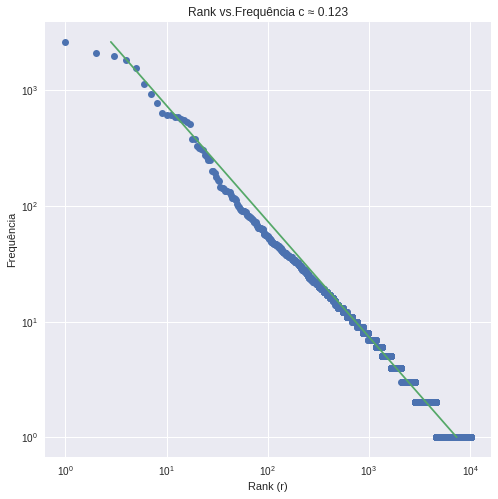

In [81]:
f, ax = plt.subplots(figsize=(8,8))
ax.set(xscale="log", yscale="log")
plt.plot(word_counts["r"], word_counts["freq"], linestyle="", marker="o")
plt.plot(word_counts["pred"], word_counts["freq"], linestyle="-", marker="")
plt.title('Rank vs.Frequência c ≈ {0:.3f}'.format(best_c_words))
plt.xlabel('Rank (r)')
plt.ylabel('Frequência')
plt.show()

No gráfico acima, cada ponto azul representa uma palavra, enquanto a reta verde representa os valores esperados da Lei de Zipf. Vemos que a Lei consegue predizer uma boa parte dos dados, mas não se comporta muito bem para valores extremos de ranking. 

## Para os bigramas

Inicialmente, vamos criar os bigramas e sua tabela de frequências. Utilizaremos novamente a biblioteca NLTK para isto, mas dessa vez usaremos a função `bigrams`. Continuaremos utilizando a mesma regra de validade dos tokens para os bigramas. 

In [55]:
bigram_list = []

for new in news.text:
  tokens = [token for token in toker.tokenize(new.lower()) if isValid(token)]
  bigram_list.extend(list(nltk.bigrams(tokens)))

bigrams_words = [bigram[0] + ' ' + bigram[1] for bigram in bigram_list]

bigrams = pd.DataFrame(bigrams_words, columns=['bigram'])
bigram_counts = bigrams.bigram.value_counts().reset_index()
bigram_counts.columns = ['bigram', 'freq']
bigram_counts['r'] = bigram_counts.freq.rank(ascending=False, method='first')
bigram_total_occurence = bigram_counts.freq.sum()
bigram_pr = (bigram_counts.freq / bigram_total_occurence)
bigram_counts['Pr %'] = round(bigram_pr * 100, 2)
bigram_r_pr = bigram_counts.r * bigram_pr
bigram_counts['r.Pr'] = round(bigram_r_pr, 3)

bigram_counts.head(50)

,bigram,freq,r,Pr %,r.Pr
0,que o,142,1.0,0.24,0.002
1,com a,119,2.0,0.20,0.004
2,o que,119,3.0,0.20,0.006
3,com o,118,4.0,0.20,0.008
4,que a,114,5.0,0.19,0.010
5,de que,86,6.0,0.14,0.009
6,que não,83,7.0,0.14,0.010
7,de um,81,8.0,0.14,0.011
8,e o,80,9.0,0.13,0.012
9,e a,75,10.0,0.13,0.013


Calculando o melhor valor de `c` para os bigramas, temos:

In [56]:
best_c_bigrams = np.mean(bigram_r_pr)
round(best_c_bigrams, 3)

0.349

Agora utilizando o valor encontrado para predizer o rank de cada bigrama:

In [0]:
bigram_counts['pred'] = best_c_bigrams / bigram_pr

Plotando o gráfico, temos:

[]

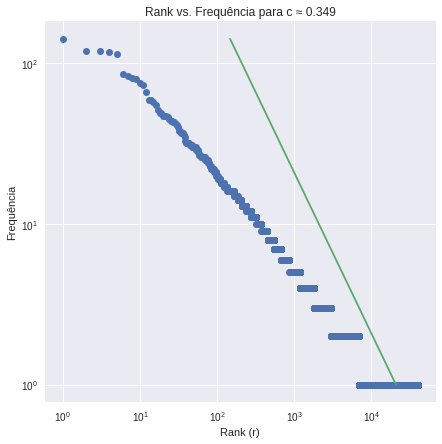

In [82]:
%matplotlib inline

f, ax = plt.subplots(figsize=(7,7))
ax.set(xscale="log", yscale="log")
plt.plot(bigram_counts["r"], bigram_counts["freq"], linestyle="", marker="o")
plt.plot(bigram_counts["pred"], bigram_counts["freq"], linestyle="-", marker="")
plt.title('Rank vs. Frequência para c ≈ {0:.3f}'.format(best_c_bigrams))
plt.xlabel('Rank (r)')
plt.ylabel('Frequência')
plt.plot()

Para os bigramas, é possível observar que a Lei de Zipf não se ajusta bem aos dados.

***
# Comparando predições com os dados reais.

Primeiramente, vamos calcular os valores reais e previstos para a proporção das palavras. Para as previsões, utilizaremos a fórmula $1 / n(n+1) $.

In [0]:
def get_occurrences_count(n):
  return len(word_counts[word_counts.freq == n])

number_of_occurrences = [i for i in range(1, 11, 1)]
predicted_proportion = [round(1.0 / (n*(n+1)), 3) for n in number_of_occurrences]
actual_proportion = [round(get_occurrences_count(n) / vocabulary_size, 3) 
                     for n in number_of_occurrences]
actual_number_words = [get_occurrences_count(n) for n in number_of_occurrences]

Calculados os valores, podemos reuní-los numa tabela.

In [84]:
columns = ['Number of Occurrences',
           'Predicted proportion',
           'Actual Proportion',
           'Actual Number of Words'
          ]
values = [number_of_occurrences,
         predicted_proportion,
         actual_proportion,
         actual_number_words
         ]
occurrences = pd.DataFrame(data = np.transpose(values), columns=columns)
occurrences

,Number of Occurrences,Predicted proportion,Actual Proportion,Actual Number of Words
0,1.0,0.500,0.553,5678.0
1,2.0,0.167,0.168,1726.0
2,3.0,0.083,0.075,768.0
3,4.0,0.050,0.043,446.0
4,5.0,0.033,0.030,306.0
5,6.0,0.024,0.018,182.0
6,7.0,0.018,0.017,179.0
7,8.0,0.014,0.012,119.0
8,9.0,0.011,0.010,101.0
9,10.0,0.009,0.008,82.0
